In [1]:
#パッケージのセットアップ
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
import math
import seaborn as sns
from scipy.stats import norm
from scipy.cluster.hierarchy import linkage, dendrogram,fcluster

In [2]:
#使うデータのダウンロード
df = pd.read_csv('df_restrant.csv')

In [3]:
#最寄駅名とジャンルの分割
station_genre = df['station_genre'].str.split('/')

In [4]:
#最寄駅＋そこからの距離の配列
station_dis = [] 
for station in station_genre:
    station_dis.append(station[0])

In [5]:
#station_disから駅のデータだけ抽出
target_station = '駅'
stations = []
for station in station_dis: 
    idx = station.rfind(target_station)
    stations.append(station[:idx+len(target_station)])

In [6]:
#最寄駅の情報データセットへの代入
df['stations'] = stations

In [7]:
#ジャンルの配列の作成
genre_all = []
for genre in station_genre:
    genre_all.append(genre[1])

In [8]:
#データセット に含まれる最寄駅の数の集計
df_group_by_station = df.groupby('stations').count()

In [9]:
#最寄駅トップ30の抽出
df_group_by_station= df_group_by_station.sort_values('id', ascending = False).head(30).sort_values('id', ascending=True)

In [10]:
#最寄駅トップ30駅名の抽出
label_stations = df_group_by_station.index.values

<function matplotlib.pyplot.show(close=None, block=None)>

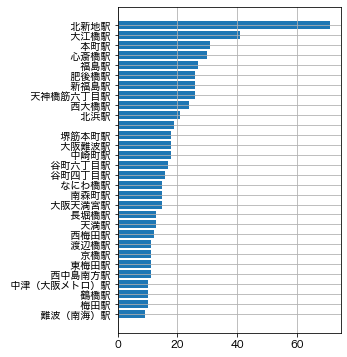

In [11]:
#棒グラフによる可視化
plt.figure(figsize=(4,6))
plt.rcParams['font.family'] = 'Hiragino Sans'
plt.barh(label_stations,df_group_by_station['id'],align="center",tick_label=label_stations)
plt.grid()
plt.show

In [12]:
#genre配列から '\n'の削除
target_genre = '\n'
genre_removen = []
for genre in genre_all : 
    idx = genre.rfind(target_genre)
    genre_removen.append(genre[:idx])

In [13]:
#配列の一要素に含まれている複数ジャンルを一つの要素として分割
genre_split = []
for i in range(0,len(genre_removen)):
    genre_split.append(genre_removen[i].split('、'))

In [14]:
#それぞれの店が持つジャンルの数
genre_count = []
for i in range(0,len(genre_split)):
    genre_count.append(len(genre_split[i]))

In [15]:
#一つの店が持つジャンルの最大値
max(genre_count)

3

In [16]:
#1つの店が持つジャンルそれぞれに対して、格納するための配列を準備し、代入
genre_1 = [float('nan')]*len(genre_split)
genre_2 = [float('nan')]*len(genre_split)
genre_3 = [float('nan')]*len(genre_split)
for i in range(0,len(genre_split)):
    for j in range(len(genre_split [i])):
        if j == 0:
            genre_1[i] = genre_split[i][j]
        if j == 1:
            genre_2[i] = genre_split[i][j]
        if j == 2:
            genre_3[i] = genre_split[i][j]

In [17]:
#データセットへのジャンルの代入
df['genre_1'] = genre_1
df['genre_2'] = genre_2
df['genre_3'] = genre_3

In [18]:
#価格から￥マークの削除、カンマの削除、-を0と換算
for i in range(len(df)):
    df['dinner_price'][i] = df['dinner_price'][i].replace(',','').replace('￥','').replace('-','0')
    df['lunch_price'][i] = df['lunch_price'][i].replace(',','').replace('￥','').replace('-','0')

/var/folders/wz/wsqynvb50dq0_6zlwfqqqs780000gp/T/ipykernel_8184/2075755931.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['dinner_price'][i] = df['dinner_price'][i].replace(',','').replace('￥','').replace('-','0')
/var/folders/wz/wsqynvb50dq0_6zlwfqqqs780000gp/T/ipykernel_8184/2075755931.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['lunch_price'][i] = df['lunch_price'][i].replace(',','').replace('￥','').replace('-','0')


In [19]:
#夕飯の時間帯、昼飯の時間帯、それぞれの価格幅を二つの要素に分割
dinner_price = df['dinner_price'].str.split('～')
lunch_price = df['lunch_price'].str.split('～')

In [20]:
#夕飯帯標準価格の設定
import math
std_price_dinner = [0]*len(dinner_price)
for i in range(len(dinner_price)):
    if dinner_price[i] != ['0']:
        if dinner_price[i][1] != '' and dinner_price[i][0] != '' :
            std_price_dinner[i] = math.floor((int(dinner_price[i][1]) - int(dinner_price[i][0]) )/2 + int(dinner_price[i][0]))
        elif dinner_price[i][1] != '' and dinner_price[i][0] == '' :
            std_price_dinner[i] = math.floor(int(dinner_price[i][1])/2 )
        elif dinner_price[i][1] == '' and dinner_price[i][0] != '' :
            std_price_dinner[i] = math.floor(int(dinner_price[i][0])*1.5)
        else:
            std_price_dinner[i] = float('nan')
    else:
        std_price_dinner[i] = float('nan')

In [21]:
df['std_price_dinner'] = std_price_dinner

In [22]:
#昼飯帯標準価格の設定
std_price_lunch = [0]*len(lunch_price)
for i in range(len(lunch_price)):
    if lunch_price[i] != ['0']:
        if lunch_price[i][1] != '' and lunch_price[i][0] != '' :
            std_price_lunch[i] = math.floor((int(lunch_price[i][1]) - int(lunch_price[i][0]) )/2 + int(lunch_price[i][0]))
        elif lunch_price[i][1] != '' and lunch_price[i][0] == '' :
            std_price_lunch[i] = math.floor(int(lunch_price[i][1])/2 )
        elif lunch_price[i][1] == '' and lunch_price[i][0] != '' :
            std_price_lunch[i] = math.floor(int(lunch_price[i][0])*1.5)
        else:
            std_price_lunch[i] = float('nan')
    else:
        std_price_lunch[i] = float('nan')

In [23]:
df['std_price_lunch'] = std_price_lunch

In [24]:
#昼限定、夜限定、昼夜の店の変数化
#昼だけ
df['lunch_only'] = 0
df['lunch_only'].loc[df['std_price_dinner'].isna()] = 1
#夜だけ
df['dinner_only'] = 0
df['dinner_only'].loc[df['std_price_lunch'].isna()] = 1
#昼、夜
df['dinner_lunch'] = 0
df['dinner_lunch'].loc[(df['lunch_only'] == 0) & (df['dinner_only'] == 0)]  = 1

/var/folders/wz/wsqynvb50dq0_6zlwfqqqs780000gp/T/ipykernel_8184/2615278233.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['lunch_only'].loc[df['std_price_dinner'].isna()] = 1
/var/folders/wz/wsqynvb50dq0_6zlwfqqqs780000gp/T/ipykernel_8184/2615278233.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['dinner_only'].loc[df['std_price_lunch'].isna()] = 1
/var/folders/wz/wsqynvb50dq0_6zlwfqqqs780000gp/T/ipykernel_8184/2615278233.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/use

In [25]:
#総合的な標準価格の算定
#標準価格列の作成
df['std_price'] = 0

#昼だけ
df['std_price'].loc[df['dinner_only'] == 1] = df['std_price_dinner'].loc[df['dinner_only'] == 1] 

#夜だけ
df['std_price'].loc[df['lunch_only'] == 1] = df['std_price_lunch'].loc[df['lunch_only'] == 1] 

#昼、夜
for i in range(len(df)):
    if df['dinner_lunch'][i] == 1:
        df['std_price'][i] = math.floor((df['std_price_dinner'][i]+df['std_price_lunch'][i])/2)


/var/folders/wz/wsqynvb50dq0_6zlwfqqqs780000gp/T/ipykernel_8184/1363657847.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['std_price'].loc[df['dinner_only'] == 1] = df['std_price_dinner'].loc[df['dinner_only'] == 1]
/var/folders/wz/wsqynvb50dq0_6zlwfqqqs780000gp/T/ipykernel_8184/1363657847.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['std_price'].loc[df['lunch_only'] == 1] = df['std_price_lunch'].loc[df['lunch_only'] == 1]
/var/folders/wz/wsqynvb50dq0_6zlwfqqqs780000gp/T/ipykernel_8184/1363657847.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the

In [26]:
#設定した標準価格をデータフレームに代入
df['std_price_dinner'] = std_price_dinner
df['std_price_lunch'] = std_price_lunch

In [27]:
#標準価格の価格帯によるダミー変数化
df['super_low_price'] = 0
df['low_price'] = 0 
df['middle_price'] = 0 
df['high_price'] = 0 
df['luxury'] = 0

for i in range(len(df)):
    if df['std_price'][i] <= 1000:
        df['super_low_price'][i] = 1
    elif df['std_price'][i] >1000 and df['std_price'][i] <= 5000:
        df['low_price'][i] = 1
    elif df['std_price'][i] > 5000 and df['std_price'][i] <= 10000:
        df['middle_price'][i] = 1
    elif df['std_price'][i] > 10000 and df['std_price'][i] <= 30000:
        df['high_price'][i] = 1
    elif df['std_price'][i] > 30000:
        df['luxury'][i] = 1

/var/folders/wz/wsqynvb50dq0_6zlwfqqqs780000gp/T/ipykernel_8184/627849666.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['luxury'][i] = 1
/var/folders/wz/wsqynvb50dq0_6zlwfqqqs780000gp/T/ipykernel_8184/627849666.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['high_price'][i] = 1
/var/folders/wz/wsqynvb50dq0_6zlwfqqqs780000gp/T/ipykernel_8184/627849666.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['low_price'

In [28]:
#ジャンル1に変な最初の空行が入っていたので修正
for i in range(len(df['genre_1'])):
    df['genre_1'][i] = df['genre_1'][i].lstrip()

/var/folders/wz/wsqynvb50dq0_6zlwfqqqs780000gp/T/ipykernel_8184/3443738424.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['genre_1'][i] = df['genre_1'][i].lstrip()


和食(japanese):'豆腐料理・湯葉料理','天丼・天重','水炊き','精進料理','おにぎり','丼もの（その他）','京料理','ちゃんこ鍋','おでん','オムライス','懐石・会席料理', '寿司','天ぷら','うなぎ','しゃぶしゃぶ',,'割烹・小料理','和食（その他）','お好み焼き','すき焼き','たこ焼き'
中華料理(chinese):'上海料理','飲茶・点心','中華料理','広東料理','餃子','四川料理','天ぷら・揚げ物（その他）',
西洋料理(western):'アメリカ料理','パン・サンドイッチ（その他）','西洋各国料理（その他）','イタリアン','モダンフレンチ','フレンチ','モダンスパニッシュ','スペイン料理','洋食','ピザ','ハンバーガー','洋食・欧風料理（その他）','サンドイッチ','パスタ'
アジア・エスニック(asia_ethnic):'インド料理','ネパール料理','タイ料理','パキスタン料理','アジア・エスニック料理（その他）','スリランカ料理','南アジア料理（その他）','韓国料理','韓国鍋',
創作料理(creative):'旅館・オーベルジュ（その他）','オーベルジュ''野菜料理','鍋（その他）','無国籍料理','沖縄料理','郷土料理（その他）','イノベーティブ・フュージョン', '創作料理','屋形船・クルージング','鉄板焼き','旅館' 
ファミレス・食堂(restaurant):'バイキング','定食・食堂','レストラン（その他）','ビストロ'
肉料理(meat):'豚料理','ハンバーグ','串焼き','コロッケ・フライ','からあげ','炭火焼き','その他肉料理','かつ丼・かつ重','ちりとり鍋・てっちゃん鍋','牛タン','焼鳥','とんかつ','焼肉','もつ料理','牛料理','ステーキ','ホルモン','串揚げ・串かつ','焼きとん','鳥料理',
魚料理(fish):'かに', '親子丼','あなご','魚介料理・海鮮料理','ふぐ','くじら料理'
酒(pub_bar)：'居酒屋・ダイニングバー（その他）','パブ','日本酒バー','ワインバー','バー・お酒（その他）','居酒屋','バー','立ち飲み居酒屋・バー','バル・バール','ダイニングバー',
麺類(noodle):'沖縄そば','中華麺（その他）','冷麺','そば・うどん・麺類（その他）','野菜料理','カレーうどん','台湾まぜそば','担々麺','うどん','ラーメン','つけ麺','そば','うどんすき','油そば','汁なし担々麺',
カレー(curry):'タイカレー','スープカレー','カレーライス','インドカレー','欧風カレー','カレー（その他）'
喫茶店・カフェ(cafe):'コーヒー専門店','大福','カフェ・喫茶（その他）','喫茶店''紅茶専門店','カフェ',
お菓子・スイーツ(sweets):'ドーナツ','パフェ','どら焼き','パンケーキ','たい焼き・大判焼き','かき氷','パン','ケーキ','スイーツ（その他）','アイスクリーム','クレープ','甘味処','フルーツパーラー','洋菓子（その他）'
'和菓子','ジュースバー','ベーグル','マカロン','バームクーヘン','中華菓子'
テイクアウト(take_out):'弁当','デリカテッセン'

In [29]:
#ジャンルの分け（ハンドコーディング）
japanese = ['豆腐料理・湯葉料理','天丼・天重','水炊き','精進料理','おにぎり','丼もの（その他）','京料理','ちゃんこ鍋','おでん','オムライス','懐石・会席料理', '寿司','天ぷら','うなぎ','しゃぶしゃぶ','割烹・小料理','和食（その他）','お好み焼き','すき焼き','たこ焼き', '天ぷら・揚げ物（その他) ']
chinese = ['上海料理','飲茶・点心','中華料理','広東料理','餃子','四川料理']
western =['アメリカ料理','パン・サンドイッチ（その他）','西洋各国料理（その他）','イタリアン','モダンフレンチ','フレンチ','モダンスパニッシュ','スペイン料理','洋食','ピザ','ハンバーガー','洋食・欧風料理（その他）','サンドイッチ','パスタ']
asia_ethnic = ['インド料理','ネパール料理','タイ料理','パキスタン料理','アジア・エスニック料理（その他）','スリランカ料理','南アジア料理（その他）','韓国料理','韓国鍋']
creative = ['旅館・オーベルジュ（その他）','オーベルジュ''野菜料理','鍋（その他）','無国籍料理','沖縄料理','郷土料理（その他）','イノベーティブ・フュージョン', '創作料理','屋形船・クルージング','鉄板焼き','旅館' ]
restaurant = ['バイキング','定食・食堂','レストラン（その他）','ビストロ']
meat = ['豚料理','ハンバーグ','串焼き','コロッケ・フライ','からあげ','炭火焼き','その他肉料理','かつ丼・かつ重','ちりとり鍋・てっちゃん鍋','牛タン','焼鳥','とんかつ','焼肉','もつ料理','牛料理','ステーキ','ホルモン','串揚げ・串かつ','焼きとん','鳥料理']
fish = ['かに', '親子丼','あなご','魚介料理・海鮮料理','ふぐ','くじら料理']
pub_bar = ['居酒屋・ダイニングバー（その他）','パブ','日本酒バー','ワインバー','バー・お酒（その他）','居酒屋','バー','立ち飲み居酒屋・バー','バル・バール','ダイニングバー']
noodle = ['沖縄そば','中華麺（その他）','冷麺','そば・うどん・麺類（その他）','野菜料理','カレーうどん','台湾まぜそば','担々麺','うどん','ラーメン','つけ麺','そば','うどんすき','油そば','汁なし担々麺']
curry = ['タイカレー','スープカレー','カレーライス','インドカレー','欧風カレー','カレー（その他）']
cafe = ['コーヒー専門店','大福','カフェ・喫茶（その他）','喫茶店''紅茶専門店','カフェ']
sweets = ['ドーナツ','パフェ','どら焼き','パンケーキ','たい焼き・大判焼き','かき氷','パン','ケーキ','スイーツ（その他）','アイスクリーム','クレープ','甘味処','フルーツパーラー','洋菓子（その他）','和菓子','ジュースバー','ベーグル','マカロン','バームクーヘン','中華菓子']
take_out = ['弁当','デリカテッセン']

In [30]:
#ジャンル名の配列
genre_new = ['japanese','chinese','western','asia_ethnic','creative','restaurant','meat','fish','pub_bar','noodle','curry','cafe','sweets','take_out']

In [31]:
#ジャンルの変数化
for genre in genre_new:
    df[f'{genre}'] = 0

In [32]:
#ジャンルの配列化
genre_new_list = [japanese,chinese,western,asia_ethnic,creative,restaurant,meat,fish,pub_bar,noodle,curry,cafe,sweets,take_out]


In [33]:
#ジャンルダミーの作成
for i in range(len(df)):
    for genre in genre_new_list:
        if df['genre_1'][i] in genre:
            x = genre_new_list.index(genre)
            df[f'{genre_new[x]}'][i] = 1
        elif df['genre_2'][i] in genre:
            x = genre_new_list.index(genre)
            df[f'{genre_new[x]}'][i] = 1
        elif df['genre_3'][i] in genre:
            x = genre_new_list.index(genre)
            df[f'{genre_new[x]}'][i] = 1       

/var/folders/wz/wsqynvb50dq0_6zlwfqqqs780000gp/T/ipykernel_8184/3718021002.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[f'{genre_new[x]}'][i] = 1
/var/folders/wz/wsqynvb50dq0_6zlwfqqqs780000gp/T/ipykernel_8184/3718021002.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[f'{genre_new[x]}'][i] = 1
/var/folders/wz/wsqynvb50dq0_6zlwfqqqs780000gp/T/ipykernel_8184/3718021002.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
 

分析

In [34]:
#分析用データセットの抽出
df_for_analysis = df[['id','name','japanese','chinese', 'western', 'asia_ethnic', 'creative', 'restaurant', 'meat','fish', 'pub_bar', 'noodle', 'curry', 'cafe', 'sweets', 'take_out', 'lunch_only','dinner_only', 'dinner_lunch','super_low_price' ,'low_price', 'middle_price', 'high_price','luxury' ]]

In [35]:
#分析に使う変数
variables = df[['japanese','chinese', 'western', 'asia_ethnic', 'creative', 'restaurant', 'meat','fish', 'pub_bar', 'noodle', 'curry', 'cafe', 'sweets', 'take_out', 'lunch_only','dinner_only', 'dinner_lunch','super_low_price' ,'low_price', 'middle_price', 'high_price','luxury' ]]

Kmeansクラスタリング 5クラス

In [36]:
#使用パッケージ
from sklearn.cluster import KMeans

In [37]:
#関数の設定
kmeans_5 = KMeans(n_clusters=5, random_state=1)

In [38]:
#射影
kmeans_5.fit(variables)

KMeans(n_clusters=5, random_state=1)

In [39]:
#結果の抽出
kmeans_5_cluster = kmeans_5.labels_

In [40]:
#結果の代入
df_for_analysis['kmeans_5'] = kmeans_5_cluster + 1

/var/folders/wz/wsqynvb50dq0_6zlwfqqqs780000gp/T/ipykernel_8184/1692765547.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_for_analysis['kmeans_5'] = kmeans_5_cluster + 1


In [41]:
#結果の描写
pd.set_option('display.max_columns', 50)
df_for_analysis.groupby('kmeans_5').mean()

,id,japanese,chinese,western,asia_ethnic,creative,restaurant,meat,fish,pub_bar,noodle,curry,cafe,sweets,take_out,lunch_only,dinner_only,dinner_lunch,super_low_price,low_price,middle_price,high_price,luxury
kmeans_5,,,,,,,,,,,,,,,,,,,,,,,
1,606.666667,0.227273,0.068182,0.083333,0.045455,0.151515,0.045455,0.424242,0.181818,0.348485,0.068182,0.015152,0.000000,0.000000,0.007576,0.000000,1.000000,0.000000,0.0,0.386364,0.545455,0.000000,0.068182
2,523.165266,0.103641,0.036415,0.098039,0.014006,0.005602,0.000000,0.019608,0.008403,0.039216,0.661064,0.095238,0.098039,0.210084,0.000000,0.156863,0.005602,0.837535,1.0,0.000000,0.000000,0.000000,0.000000
3,550.360656,0.139344,0.061475,0.180328,0.057377,0.049180,0.053279,0.110656,0.036885,0.122951,0.299180,0.188525,0.114754,0.176230,0.008197,0.180328,0.000000,0.819672,0.0,1.000000,0.000000,0.000000,0.000000
4,411.699346,0.424837,0.071895,0.444444,0.019608,0.163399,0.071895,0.137255,0.163399,0.098039,0.013072,0.006536,0.000000,0.013072,0.006536,0.000000,0.000000,1.000000,0.0,0.000000,0.483660,0.503268,0.013072
5,319.052632,0.631579,0.043860,0.105263,0.017544,0.140351,0.008772,0.263158,0.149123,0.078947,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.0,0.000000,0.000000,0.973684,0.026316



kemans 5クラスの定性分類→
クラス1:夜にがっつり食べたい、お酒を飲みたい時に
クラス2:リーズナブルなお店ですませたいときに
クラス3:普段使いに最適
クラス4:ちょっと贅沢したいときに
クラス5:特別な日に

階層クラスタリング_5クラス

In [42]:
#パッケージのダウンロード
from scipy.cluster.hierarchy import dendrogram, linkage

In [43]:
#ward距離を使って分類
hierarchy = linkage(variables, 'ward')

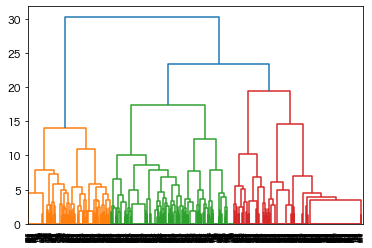

In [44]:
#デンドログラムの描写
dendrogram(hierarchy)
plt.show()

In [45]:
#計算用のパッケージ
from sklearn.cluster import AgglomerativeClustering

In [46]:
#関数の設定
hir_clus   = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage = 'ward')

In [47]:
#射影
hierarchy_5_cluster = hir_clus.fit_predict(variables)

In [48]:
#結果の代入
df_for_analysis['hierarchy_5'] = hierarchy_5_cluster + 1

/var/folders/wz/wsqynvb50dq0_6zlwfqqqs780000gp/T/ipykernel_8184/3963428988.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_for_analysis['hierarchy_5'] = hierarchy_5_cluster + 1


In [49]:
#結果の描写
df_for_analysis.groupby('hierarchy_5').mean()

,id,japanese,chinese,western,asia_ethnic,creative,restaurant,meat,fish,pub_bar,noodle,curry,cafe,sweets,take_out,lunch_only,dinner_only,dinner_lunch,super_low_price,low_price,middle_price,high_price,luxury,kmeans_5
hierarchy_5,,,,,,,,,,,,,,,,,,,,,,,,
1,535.584507,0.112676,0.042254,0.102113,0.003521,0.003521,0.000000,0.024648,0.010563,0.031690,0.728873,0.014085,0.091549,0.221831,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,2.000000
2,462.678715,0.413655,0.068273,0.088353,0.028112,0.152610,0.024096,0.345382,0.168675,0.220884,0.036145,0.004016,0.000000,0.000000,0.004016,0.000000,0.979920,0.020080,0.000000,0.196787,0.289157,0.457831,0.056225,2.891566
3,424.585034,0.435374,0.054422,0.462585,0.013605,0.156463,0.074830,0.142857,0.163265,0.102041,0.013605,0.000000,0.000000,0.013605,0.006803,0.000000,0.000000,1.000000,0.000000,0.000000,0.496599,0.503401,0.000000,4.000000
4,480.637255,0.117647,0.000000,0.107843,0.039216,0.009804,0.000000,0.009804,0.009804,0.019608,0.382353,0.294118,0.166667,0.245098,0.000000,0.970588,0.029412,0.000000,0.568627,0.431373,0.000000,0.000000,0.000000,2.411765
5,558.477064,0.123853,0.073394,0.183486,0.073394,0.055046,0.064220,0.119266,0.036697,0.151376,0.288991,0.220183,0.091743,0.137615,0.009174,0.004587,0.004587,0.990826,0.068807,0.926606,0.004587,0.000000,0.000000,2.926606


hierarchy_5クラスの定性分類→
クラス1:リーズナブルなお店ですませたいときに
クラス2:夜にがっつり食べたい、お酒を飲みたい時に
クラス3:昼も夜も選べるお店
クラス4:ランチタイムに最適
クラス5:ビストロ、創作料理

コンテンツベースフィルタリング

In [101]:
#フィルタリングに使うデータ
df_contents_based = df[['name','japanese','chinese', 'western', 'asia_ethnic', 'creative', 'restaurant', 'meat','fish', 'pub_bar', 'noodle', 'curry', 'cafe', 'sweets', 'take_out', 'lunch_only','dinner_only', 'dinner_lunch','super_low_price' ,'low_price', 'middle_price', 'high_price','luxury' ]]
#アラカンパーニュの追加
df_contents_based =df_contents_based.append({'name':'アラカンパーニュ','japanese':0,'chinese':0, 'western':0, 'asia_ethnic':0, 'creative':0, 'restaurant':0, 'meat':0,'fish':0, 'pub_bar':0, 'noodle':0, 'curry':0, 'cafe':1, 'sweets':1, 'take_out':0, 'lunch_only':0,'dinner_only':0, 'dinner_lunch':1,'super_low_price':0 ,'low_price':1, 'middle_price':0, 'high_price':0,'luxury':0}, ignore_index=True)
#カプリチョーザの追加
df_contents_based =df_contents_based.append({'name':'カプリチョーザ','japanese':0,'chinese':0, 'western':1, 'asia_ethnic':0, 'creative':0, 'restaurant':0, 'meat':0,'fish':0, 'pub_bar':0, 'noodle':1, 'curry':0, 'cafe':0, 'sweets':0, 'take_out':0, 'lunch_only':0,'dinner_only':0, 'dinner_lunch':1,'super_low_price':0 ,'low_price':1, 'middle_price':0, 'high_price':0,'luxury':0}, ignore_index=True)
#店名はインデックス として使用
df_contents_based = df_contents_based.set_index('name')
#追加したデータの確認
df_contents_based.tail(2)

/var/folders/wz/wsqynvb50dq0_6zlwfqqqs780000gp/T/ipykernel_8184/32419508.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_contents_based =df_contents_based.append({'name':'アラカンパーニュ','japanese':0,'chinese':0, 'western':0, 'asia_ethnic':0, 'creative':0, 'restaurant':0, 'meat':0,'fish':0, 'pub_bar':0, 'noodle':0, 'curry':0, 'cafe':1, 'sweets':1, 'take_out':0, 'lunch_only':0,'dinner_only':0, 'dinner_lunch':1,'super_low_price':0 ,'low_price':1, 'middle_price':0, 'high_price':0,'luxury':0}, ignore_index=True)
/var/folders/wz/wsqynvb50dq0_6zlwfqqqs780000gp/T/ipykernel_8184/32419508.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_contents_based =df_contents_based.append({'name':'カプリチョーザ','japanese':0,'chinese':0, 'western':1, 'asia_ethnic':0, 'creative':0, 'restaurant':0, 'meat':0,'fish':0, 'pub_bar':0, 'n

,japanese,chinese,western,asia_ethnic,creative,restaurant,meat,fish,pub_bar,noodle,curry,cafe,sweets,take_out,lunch_only,dinner_only,dinner_lunch,super_low_price,low_price,middle_price,high_price,luxury
name,,,,,,,,,,,,,,,,,,,,,,
アラカンパーニュ,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,1,0,0,0
カプリチョーザ,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0


In [102]:
#行列の作成
contents_mat = np.array(df_contents_based)

In [103]:
#店ごとのノルムの計算
norm = np.matrix(np.linalg.norm(contents_mat, axis=1))

In [74]:
norm 

matrix([[1.73205081, 1.73205081, 1.73205081, ..., 2.23606798, 2.        ,
         2.        ]])

In [80]:
norm.T
norm_matrix = np.dot(norm.T, norm)
pd.DataFrame(norm_matrix)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,...,977,978,979,980,981,982,983,984,985,986,987,988,989,990,991,992,993,994,995,996,997,998,999,1000,1001
0,3.000000,3.000000,3.000000,3.000000,3.464102,3.000000,3.000000,3.464102,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.464102,3.464102,3.000000,3.000000,3.000000,3.000000,3.464102,3.464102,...,3.000000,3.464102,3.872983,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.872983,3.000000,3.464102,3.464102,3.464102,3.464102,3.000000,3.464102,3.000000,3.000000,3.872983,3.464102,3.464102
1,3.000000,3.000000,3.000000,3.000000,3.464102,3.000000,3.000000,3.464102,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.464102,3.464102,3.000000,3.000000,3.000000,3.000000,3.464102,3.464102,...,3.000000,3.464102,3.872983,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.872983,3.000000,3.464102,3.464102,3.464102,3.464102,3.000000,3.464102,3.000000,3.000000,3.872983,3.464102,3.464102
2,3.000000,3.000000,3.000000,3.000000,3.464102,3.000000,3.000000,3.464102,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.464102,3.464102,3.000000,3.000000,3.000000,3.000000,3.464102,3.464102,...,3.000000,3.464102,3.872983,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.872983,3.000000,3.464102,3.464102,3.464102,3.464102,3.000000,3.464102,3.000000,3.000000,3.872983,3.464102,3.464102
3,3.000000,3.000000,3.000000,3.000000,3.464102,3.000000,3.000000,3.464102,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.464102,3.464102,3.000000,3.000000,3.000000,3.000000,3.464102,3.464102,...,3.000000,3.464102,3.872983,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.872983,3.000000,3.464102,3.464102,3.464102,3.464102,3.000000,3.464102,3.000000,3.000000,3.872983,3.464102,3.464102
4,3.464102,3.464102,3.464102,3.464102,4.000000,3.464102,3.464102,4.000000,3.464102,3.464102,3.464102,3.464102,3.464102,3.464102,3.464102,3.464102,3.464102,4.000000,4.000000,3.464102,3.464102,3.464102,3.464102,4.000000,4.000000,...,3.464102,4.000000,4.472136,3.464102,3.464102,3.464102,3.464102,3.464102,3.464102,3.464102,3.464102,3.464102,4.472136,3.464102,4.000000,4.000000,4.000000,4.000000,3.464102,4.000000,3.464102,3.464102,4.472136,4.000000,4.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
997,3.000000,3.000000,3.000000,3.000000,3.464102,3.000000,3.000000,3.464102,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.464102,3.464102,3.000000,3.000000,3.000000,3.000000,3.464102,3.464102,...,3.000000,3.464102,3.872983,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.872983,3.000000,3.464102,3.464102,3.464102,3.464102,3.000000,3.464102,3.000000,3.000000,3.872983,3.464102,3.464102
998,3.000000,3.000000,3.000000,3.000000,3.464102,3.000000,3.000000,3.464102,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.464102,3.464102,3.000000,3.000000,3.000000,3.000000,3.464102,3.464102,...,3.000000,3.464102,3.872983,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.872983,3.000000,3.464102,3.464102,3.464102,3.464102,3.000000,3.464102,3.000000,3.000000,3.872983,3.464102,3.464102
999,3.872983,3.872983,3.872983,3.872983,4.472136,3.872983,3.872983,4.472136,3.872983,3.872983,3.872983,3.872983,3.872983,3.872983,3.872983,3.872983,3.872983,4.472136,4.472136,3.872983,3.872983,3.872983,3.872983,4.472136,4.472136,...,3.872983,4.472136,5.000000,3.872983,3.872983,3.872983,3.872983,3.872983,3.872983,3.872983,3.872983,3.872983,5.000000,3.872983,4.472136,4.472136,4.472136,4.472136,3.872983,4.472136,3.872983,3.

In [82]:
pd.DataFrame(np.dot(contents_mat, contents_mat.T))

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,...,977,978,979,980,981,982,983,984,985,986,987,988,989,990,991,992,993,994,995,996,997,998,999,1000,1001
0,3,3,2,1,0,1,2,2,2,1,1,1,0,0,1,1,2,1,1,2,2,0,0,2,2,...,0,2,1,1,0,1,1,1,0,1,2,2,0,0,1,1,0,0,1,0,0,0,0,0,0
1,3,3,2,1,0,1,2,2,2,1,1,1,0,0,1,1,2,1,1,2,2,0,0,2,2,...,0,2,1,1,0,1,1,1,0,1,2,2,0,0,1,1,0,0,1,0,0,0,0,0,0
2,2,2,3,2,1,2,3,1,3,2,0,2,0,1,2,1,1,2,2,3,3,1,0,3,3,...,0,3,1,2,0,2,1,2,0,1,3,2,0,0,1,1,0,0,1,0,0,0,0,0,0
3,1,1,2,3,1,2,2,1,2,1,0,2,1,1,3,2,1,1,3,2,2,1,0,2,2,...,0,2,1,1,0,1,1,2,0,0,2,1,1,0,0,0,0,1,1,0,0,0,0,0,0
4,0,0,1,1,4,1,1,2,1,2,2,1,1,3,1,0,1,2,2,1,1,3,0,2,1,...,1,1,1,2,2,2,0,2,2,0,1,0,2,1,1,1,1,2,0,1,1,1,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
997,0,0,0,0,1,0,0,0,0,1,1,0,1,1,0,0,0,1,0,0,0,1,0,0,0,...,1,0,0,1,1,1,0,0,1,0,0,0,1,2,2,3,2,1,0,2,3,2,1,2,1
998,0,0,0,0,1,0,0,0,0,1,1,0,2,1,0,0,0,1,0,0,0,1,1,0,0,...,2,0,0,1,1,1,1,0,2,1,0,1,1,1,1,2,1,2,1,1,2,3,2,3,2
999,0,0,0,0,1,1,0,0,0,1,1,1,2,1,0,0,0,1,0,0,0,1,2,0,0,...,3,0,1,1,1,1,2,0,2,1,0,1,1,2,2,1,3,2,2,1,1,2,5,2,3
1000,0,0,0,0,1,0,0,0,0,1,1,0,2,1,0,0,0,1,0,0,0,1,1,0,0,...,2,0,0,1,1,1,1,0,2,1,0,1,1,1,1,2,1,2,1,1,2,3,2,4,2


In [104]:
#類似性の計算
similarity = np.array(
    np.dot(contents_mat, contents_mat.T)/np.dot(norm.T, norm)
)

In [105]:
#類似性の可視化 max:1~min:0
df_sim = pd.DataFrame(similarity, index= df_contents_based.index, columns= df_contents_based.index)
df_sim 

name,本湖月,鮨 おおが,米増,鳥匠 いし井,Fujiya 1935,中国菜 火ノ鳥,鮓 きずな,ハジメ,尽誠,鮨 三心,カハラ,月泉,とんかつ マンジェ,クイントカント,生ホルモン処 おさむちゃん。,焼肉政ちゃん,スガラボヴィー,緒乃,トムクリオーザ,もめん,お料理 宮本,フナシェフ,手造りうどん 楽々,カモシヤ クスモト,寿し おおはた,...,バー ウイスキー,彩さい,ぼちぼち,日本料理・ブランド松葉蟹 松屋町 青天,ルイーズ,若桜,田島屋,ア・カント,バンブードール,鮓直,和顔,花くじら 本店,ロウリーズ・ザ・プライムリブ 大阪,カドヤ食堂 阪神梅田店,麺や輝 中津店,うまい屋,麺や マルショウ 地下鉄新大阪店,Revo 本店,香川,カンティプール 天五店,五感 梅田阪急店,西洋茶館,ライオン飯店,アラカンパーニュ,カプリチョーザ
name,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
本湖月,1.000000,1.000000,0.666667,0.333333,0.000000,0.333333,0.666667,0.577350,0.666667,0.333333,0.333333,0.333333,0.000000,0.000000,0.333333,0.333333,0.666667,0.288675,0.288675,0.666667,0.666667,0.000000,0.000000,0.577350,0.577350,...,0.000000,0.577350,0.258199,0.333333,0.000000,0.333333,0.333333,0.333333,0.000000,0.333333,0.666667,0.666667,0.000000,0.000000,0.288675,0.288675,0.000000,0.000000,0.333333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
鮨 おおが,1.000000,1.000000,0.666667,0.333333,0.000000,0.333333,0.666667,0.577350,0.666667,0.333333,0.333333,0.333333,0.000000,0.000000,0.333333,0.333333,0.666667,0.288675,0.288675,0.666667,0.666667,0.000000,0.000000,0.577350,0.577350,...,0.000000,0.577350,0.258199,0.333333,0.000000,0.333333,0.333333,0.333333,0.000000,0.333333,0.666667,0.666667,0.000000,0.000000,0.288675,0.288675,0.000000,0.000000,0.333333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
米増,0.666667,0.666667,1.000000,0.666667,0.288675,0.666667,1.000000,0.288675,1.000000,0.666667,0.000000,0.666667,0.000000,0.333333,0.666667,0.333333,0.333333,0.577350,0.577350,1.000000,1.000000,0.333333,0.000000,0.866025,0.866025,...,0.000000,0.866025,0.258199,0.666667,0.000000,0.666667,0.333333,0.666667,0.000000,0.333333,1.000000,0.666667,0.000000,0.000000,0.288675,0.288675,0.000000,0.000000,0.333333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
鳥匠 いし井,0.333333,0.333333,0.666667,1.000000,0.288675,0.666667,0.666667,0.288675,0.666667,0.333333,0.000000,0.666667,0.333333,0.333333,1.000000,0.666667,0.333333,0.288675,0.866025,0.666667,0.666667,0.333333,0.000000,0.577350,0.577350,...,0.000000,0.577350,0.258199,0.333333,0.000000,0.333333,0.333333,0.666667,0.000000,0.000000,0.666667,0.333333,0.258199,0.000000,0.000000,0.000000,0.000000,0.288675,0.333333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Fujiya 1935,0.000000,0.000000,0.288675,0.288675,1.000000,0.288675,0.288675,0.500000,0.288675,0.577350,0.577350,0.288675,0.288675,0.866025,0.288675,0.000000,0.288675,0.500000,0.500000,0.288675,0.288675,0.866025,0.000000,0.500000,0.250000,...,0.288675,0.250000,0.223607,0.577350,0.577350,0.577350,0.000000,0.577350,0.577350,0.000000,0.288675,0.000000,0.447214,0.288675,0.250000,0.250000,0.250000,0.500000,0.000000,0.250000,0.288675,0.288675,0.223607,0.250000,0.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
五感 梅田阪急店,0.000000,0.000000,0.000000,0.000000,0.288675,0.000000,0.000000,0.000000,0.000000,0.333333,0.333333,0.000000,0.333333,0.333333,0.000000,0.000000,0.000000,0.288675,0.000000,0.000000,0.000000,0.333333,0.000000,0.000000,0.000000,...,0.333333,0.000000,0.000000,0.333333,0.333333,0.333333,0.000000,0.000000,0.333333,0.000000,0.000000,0.000000,0.258199,0.666667,0.577350,0.866025,0.577350,0.288675,0.000000,0.577350,1.000000,0.666667,0.258199,0.577350,0.288675
西洋茶館,0.000000,0.000000,0.000000,0.000000,0.288675,0.000000,0.000000,0.000000,0.000000,0.333333,0.333333,0.000000,0.666667,0.333333,0.000000,0.000000,0.000000,0.288675,0.000000,0.000000,0.000000,0.333333,0.333333,0.000000,0.000000,...,0.666667,0.000000,0.000000,0.333333,0.333333,0.333333,0.333333,0.000000,0.666667,0.333333,0.000000,0.333333,0.258199,0.333333,0.288675,0.577350,0.288675,0.577350,0.333333,0.288675,0.666667,1.000000,0.516398,0.866025,0.577350
ライオン飯店,0.000000,0.000000,0.000000,0.000000,0.223607,0.258199,0.000000,0.000000,0.000000,0.258199,0.258199,0.258199,0.516398,0.258199,0.

In [106]:
#例として本湖月と類似性が高い順に10件の店を抽出してみる
df_sim[['本湖月']][1:len(df_sim)].rename(columns={'本湖月': '類似性'}).sort_values('類似性', ascending = False).head(10)

name,類似性
name,
鮨 おおが,1.000000
松弥,1.000000
牛寶,0.866025
鮨 のぐち,0.666667
割烹 橋本,0.666667
よし光,0.666667
料理屋 稲家,0.666667
肉割烹 山口,0.666667
寿司割烹 もり,0.666667


In [110]:
df_sim[['アラカンパーニュ']][0:len(df_sim)].sort_values('アラカンパーニュ', ascending = False).head(20)

name,アラカンパーニュ
name,
カカオティエ ゴカン 高麗橋本店,1.000000
サロン・ド・テ・アルション 法善寺本店,1.000000
アラカンパーニュ,1.000000
ドゥブルベ・ボレロ 大阪本町店,1.000000
MLESNATEA OSAKA,1.000000
カカオサンパカ 大丸梅田店,1.000000
パティスリー アクイユ,1.000000
パティスリー ショコラトリー オーディネール,1.000000
ショコラティエ パレ ド オール 大阪,1.000000


In [112]:
df_sim[['カプリチョーザ']][0:len(df_sim)].sort_values('カプリチョーザ', ascending = False).head(20)

name,カプリチョーザ
name,
カプリチョーザ,1.000000
ル ヴェール フレ,0.894427
ラーメン人生JET,0.866025
麺麓menroku,0.866025
讃岐うどん 白庵,0.866025
彩哲,0.866025
中村商店 高槻本店,0.866025
別邸 三く 中華き蕎麦 萃,0.866025
らーめん これこれ,0.866025
